# **NUMCS** 



### **Introduction:**

NumCS or Numerical Methods is widely used in todays research. From Physics, to simulation and AI, numerical evaluation is a vital task or that sometimes posses a huge challenge.
Math is nice and on paper everything (that can be solved) has a set of rules, that when followed correctly calculate the correct solution. Integrals, Derivatives, Interpolation are some examples of such computations. But Mathematical Numbers as we know them, are not equiavalent to the set of Machine Numbers. There are rounding errors that can occur either via cancellation or via overflow/underflow when operating with Machine Numbers. The goal of this lecture is to efficiently and correctly implement vital Mathematical Concepts in the world of Machine Numbers. The language of the implementetion is Python and common package used throughout is the numpy package. 

### **Chapter 0 - Differentials**

An example where cancelletion can take place is when evaluating differentialquotient: 

 ![Cancelation](Images/Chapter0-Cancelation.png)

 The code below shows a convergance at the start but then the relative error starts growing.

In [36]:
from numpy import exp, sin, cos

f = exp; df = exp; x = 0
print(f.__name__, x)
h= 0.1
for k in range (1,21):
    ndf = (f(x+h)- f(x))/h
    print(
        "relative error: ", abs((ndf-df(x)/df(x)))
    )
    h*= 0.1


exp 0
relative error:  0.051709180756477124
relative error:  0.005016708416794691
relative error:  0.0005001667083843753
relative error:  5.000166714075327e-05
relative error:  5.0000069644617895e-06
relative error:  4.99962183209135e-07
relative error:  4.943367981624647e-08
relative error:  6.077471526033662e-09
relative error:  8.274037055500116e-08
relative error:  8.274037055500116e-08
relative error:  8.274037033295656e-08
relative error:  8.890058234034548e-05
relative error:  0.0007992778373597798
relative error:  0.0007992778373598908
relative error:  0.11022302462515565
relative error:  1.0
relative error:  1.0
relative error:  1.0
relative error:  1.0
relative error:  1.0


To avoid such cancelation  we can use the imaginary step to with ih Complex and we assume that the funktion f is smooth around x0. So f can be written as a sum of a Power Series that converges around x0:

![PowerSeries](Images/Chapter0-PowerSeries.png)

Now f is endlessly differentiable by using Taylot expansion we can approximate f(x0 + ih)

![Imaginary1](Images/Chapter0-Imaginary1.png)

![Imaginary2](Images/Chapter0-Imaginary2.png)

diffd1
arctan
Relativer Fehler:
[2.07866408e-01 1.13646244e-01 5.94612021e-02 3.04131270e-02
 1.53796939e-02 7.73341104e-03 3.87762954e-03 1.94154975e-03
 9.71459110e-04 4.85900674e-04 2.42993124e-04 1.21507259e-04
 6.07563042e-05 3.03788197e-05 1.51895770e-05 7.59482296e-06
 3.79743389e-06 1.89869112e-06 9.49400128e-07 4.74593835e-07
 2.37126369e-07 1.18263997e-07 5.96046448e-08 3.07895243e-08
 1.02072954e-08 1.02072954e-08 6.25848770e-09 6.25848770e-09
 7.21216202e-08 5.96046448e-08 5.96046448e-08 4.67300415e-07
 4.67300415e-07 2.57492065e-06 1.64031982e-06 6.79016113e-06
 1.00708008e-05 1.00708008e-05 5.73730469e-05 5.73730469e-05
 3.27148437e-04 3.27148437e-04 7.51953125e-04 1.40625000e-03
 1.40625000e-03 1.40625000e-03 1.40625000e-03 3.59375000e-02
 3.31250000e-02 1.05000000e-01 1.05000000e-01 1.05000000e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
-----------
diffih
arctan
Relativer Fehler:
[4.65704

C:\Users\Admin\AppData\Local\Temp\ipykernel_15344\4099772321.py:77: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


diffd1
exp
Relativer Fehler:
[2.97442541e-01 1.36101667e-01 6.51876245e-02 3.19113427e-02
 1.57890400e-02 7.85334955e-03 3.91644243e-03 1.95567062e-03
 9.77198593e-04 4.88440235e-04 2.44180366e-04 1.22080247e-04
 6.10376400e-05 3.05181984e-05 1.52589438e-05 7.62943394e-06
 3.81470808e-06 1.90733062e-06 9.53700023e-07 4.76904097e-07
 2.38351129e-07 1.18997143e-07 6.00951752e-08 2.90941397e-08
 1.42136427e-08 4.29331137e-09 5.62701998e-09 5.62701998e-09
 3.40543054e-08 3.40543054e-08 1.24670996e-07 1.24670996e-07
 1.24670996e-07 1.24670996e-07 1.24670996e-07 5.20388065e-06
 5.20388065e-06 5.20388065e-06 5.20388065e-06 8.64712351e-05
 8.64712351e-05 8.64712351e-05 8.64712351e-05 1.38674891e-03
 1.38674891e-03 1.38674891e-03 1.38674891e-03 1.38674891e-03
 1.38674891e-03 1.38674891e-03 1.38674891e-03 3.34257833e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
-----------
diffih
exp
Relativer Fehler:
[4.11489228e-0

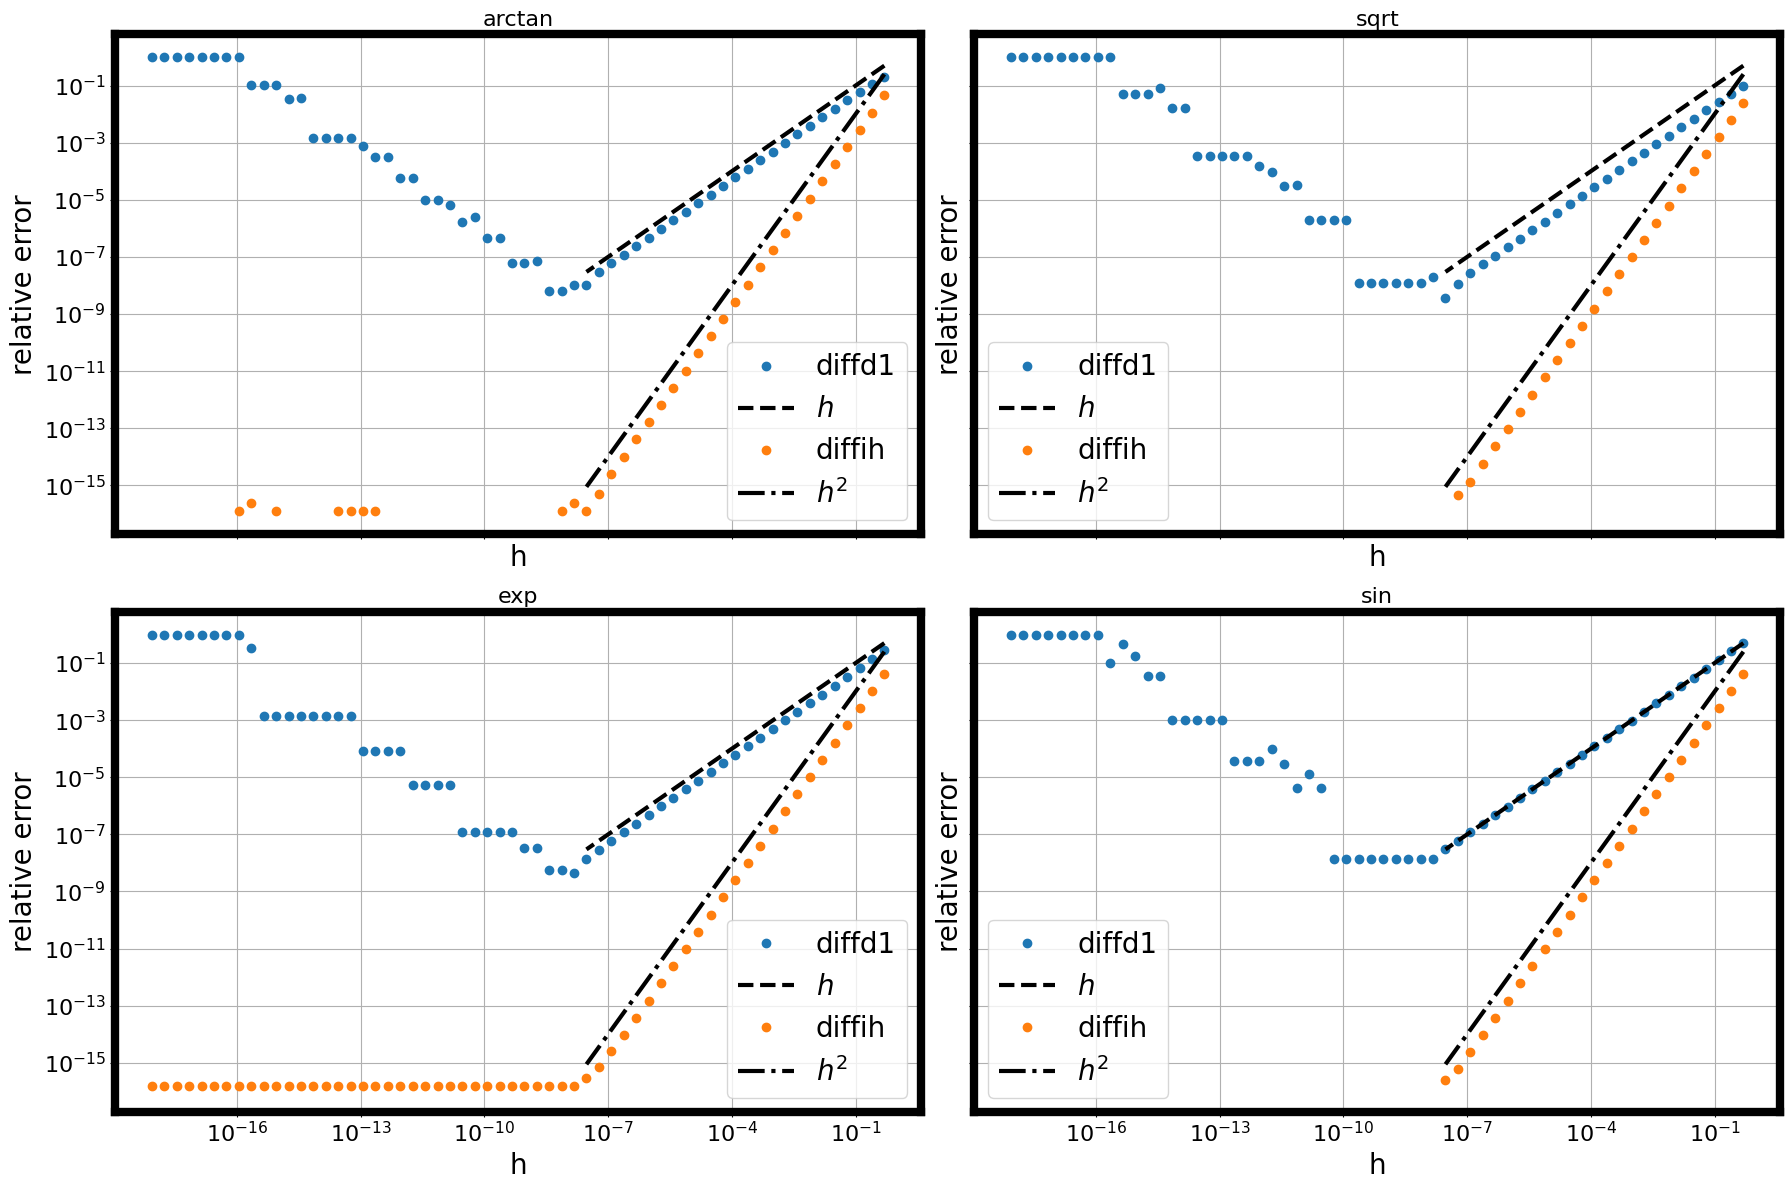

In [37]:
%matplotlib inline
import numpy as np

# def of dv
def diffd1(f,x, h0):
    nit = 60 # max depth of iterations
    h = np.zeros(nit); h[0] = h0 # width of diff. quot
    y = np.zeros(nit)
    y[0] = ( f(x+h[0]) - f(x) )/h[0]
    for k in range(1,nit):
        h[k] = h[k-1]*0.5
        y[k] = ( f(x+h[k]) - f(x) )/h[k]
    return y, h
    
# complex imaginary step
def diffih(f,x, h0):
    nit = 60 # max depth of iterations
    h = np.zeros(nit); h[0] = h0 # width of diff. quot
    y = np.zeros(nit)
    y[0] = np.imag( f(x+1.j*h[0]) )/h[0]
    for k in range(1,nit):
        h[k] = h[k-1]*0.5 #h gets decreased by half each iteration
        y[k] = np.imag( f(x+1j*h[k]) )/h[k]
    return y, h

# printing routine
def prnt(pname,f,df,x,h0, ax):
    print(f.__name__)
    z,h = pname(f, x, h0)
    rerr = abs(z - df(x)) / df(x)
    ax.loglog(h,rerr, '.', label=pname.__name__)
    kt = 25
    if pname.__name__ == 'diffd1':
        ax.loglog(h[:kt], h[:kt], 'k--', label='$h$')
    else:
        ax.loglog(h[:kt], h[:kt]**2, 'k-.', label='$h^2$')
    print('Relativer Fehler:')
    print(  rerr )
    print('-----------')
    

x = 1.1 # where to evaluate
h0 = 0.5 # staring step

datan = lambda x: 1/(1+x**2)
dsqrt = lambda x: 0.5*x**-0.5
dcos = lambda x: -np.sin(x)

lof = [np.arctan, np.sqrt, np.exp, np.sin]#, np.cos]
lod = [datan, dsqrt, np.exp, np.cos]#, dcos]

from matplotlib import pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),
          #'text.fontsize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 16,
          'lines.markersize'  : 12,
          'ytick.labelsize': 16#,
          #'text.usetex': True
          }
plt.rcParams.update(params)


fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axsp = axs.flatten()
for f, df, ax in zip (lof,lod, axsp):
    print('diffd1')
    prnt(diffd1,f,df,x,h0,ax)
    print('diffih')
    prnt(diffih,f,df,x,h0,ax)
    ax.grid(True, which="both")
    ax.set_xlabel('h')
    ax.set_ylabel('relative error')
    ax.set_title(f.__name__)
    ax.legend()
    fig.tight_layout()

plt.show()



##### **Richardson Acceleration**

Another way to avoid cancelation is to use a Method that converges faster so that there is no case where cancelation can occur.

The idea is that we can approxiamate the derivative faster and faster with d(h). By letting halving h and ubstracting the old d(h) we get a faster convergence of the error.

![Richardson1](Images/Chapter0-Richardson1.png)
![Richardson2](Images/Chapter0-Richardson2.png)
![Richardson3](Images/Chapter0-Richardson3.png)
![Richardson4](Images/Chapter0-Richardson4.png)

Then by defining d1(h) = to the last equation we can keep on repeating this process.

![Richardson5](Images/Chapter0-Richardson5.png)

So we can build the follwing Richardson Schema for computing the derivative:


![Richardson6](Images/Chapter0-Richardson6.png)
![Richardson7](Images/Chapter0-Richardson7.png)


diffd2:
arctan
Relativer Fehler:
[4.26282997e-02 1.10903127e-02 2.79679012e-03 7.00663879e-04
 1.75256877e-04 4.38198894e-05 1.09553265e-05 2.73885379e-06
 6.84714843e-07 1.71178747e-07 4.27947077e-08 1.06990433e-08
 2.67468749e-09 6.68724164e-10 1.68238325e-10 4.36193609e-11
 3.41969508e-12 1.94995614e-11 4.48199039e-11 8.38190267e-11
 8.38190267e-11 8.38190267e-11 8.38190267e-11 8.38190267e-11
 2.14204192e-09 1.97440386e-09 6.25848770e-09 6.25848770e-09
 6.25848770e-09 5.96046448e-08 5.96046448e-08 5.96046448e-08
 4.67300415e-07 4.67300415e-07 1.64031982e-06 1.64031982e-06
 1.00708008e-05 1.00708008e-05 1.00708008e-05 5.73730469e-05
 5.73730469e-05 3.27148437e-04 7.51953125e-04 1.40625000e-03
 1.40625000e-03 1.40625000e-03 1.40625000e-03 1.40625000e-03
 3.31250000e-02 3.31250000e-02 1.05000000e-01 1.05000000e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
-----------
diffRichardsonV:
arctan
Relativer Fehle

C:\Users\Admin\AppData\Local\Temp\ipykernel_15344\1827183252.py:78: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


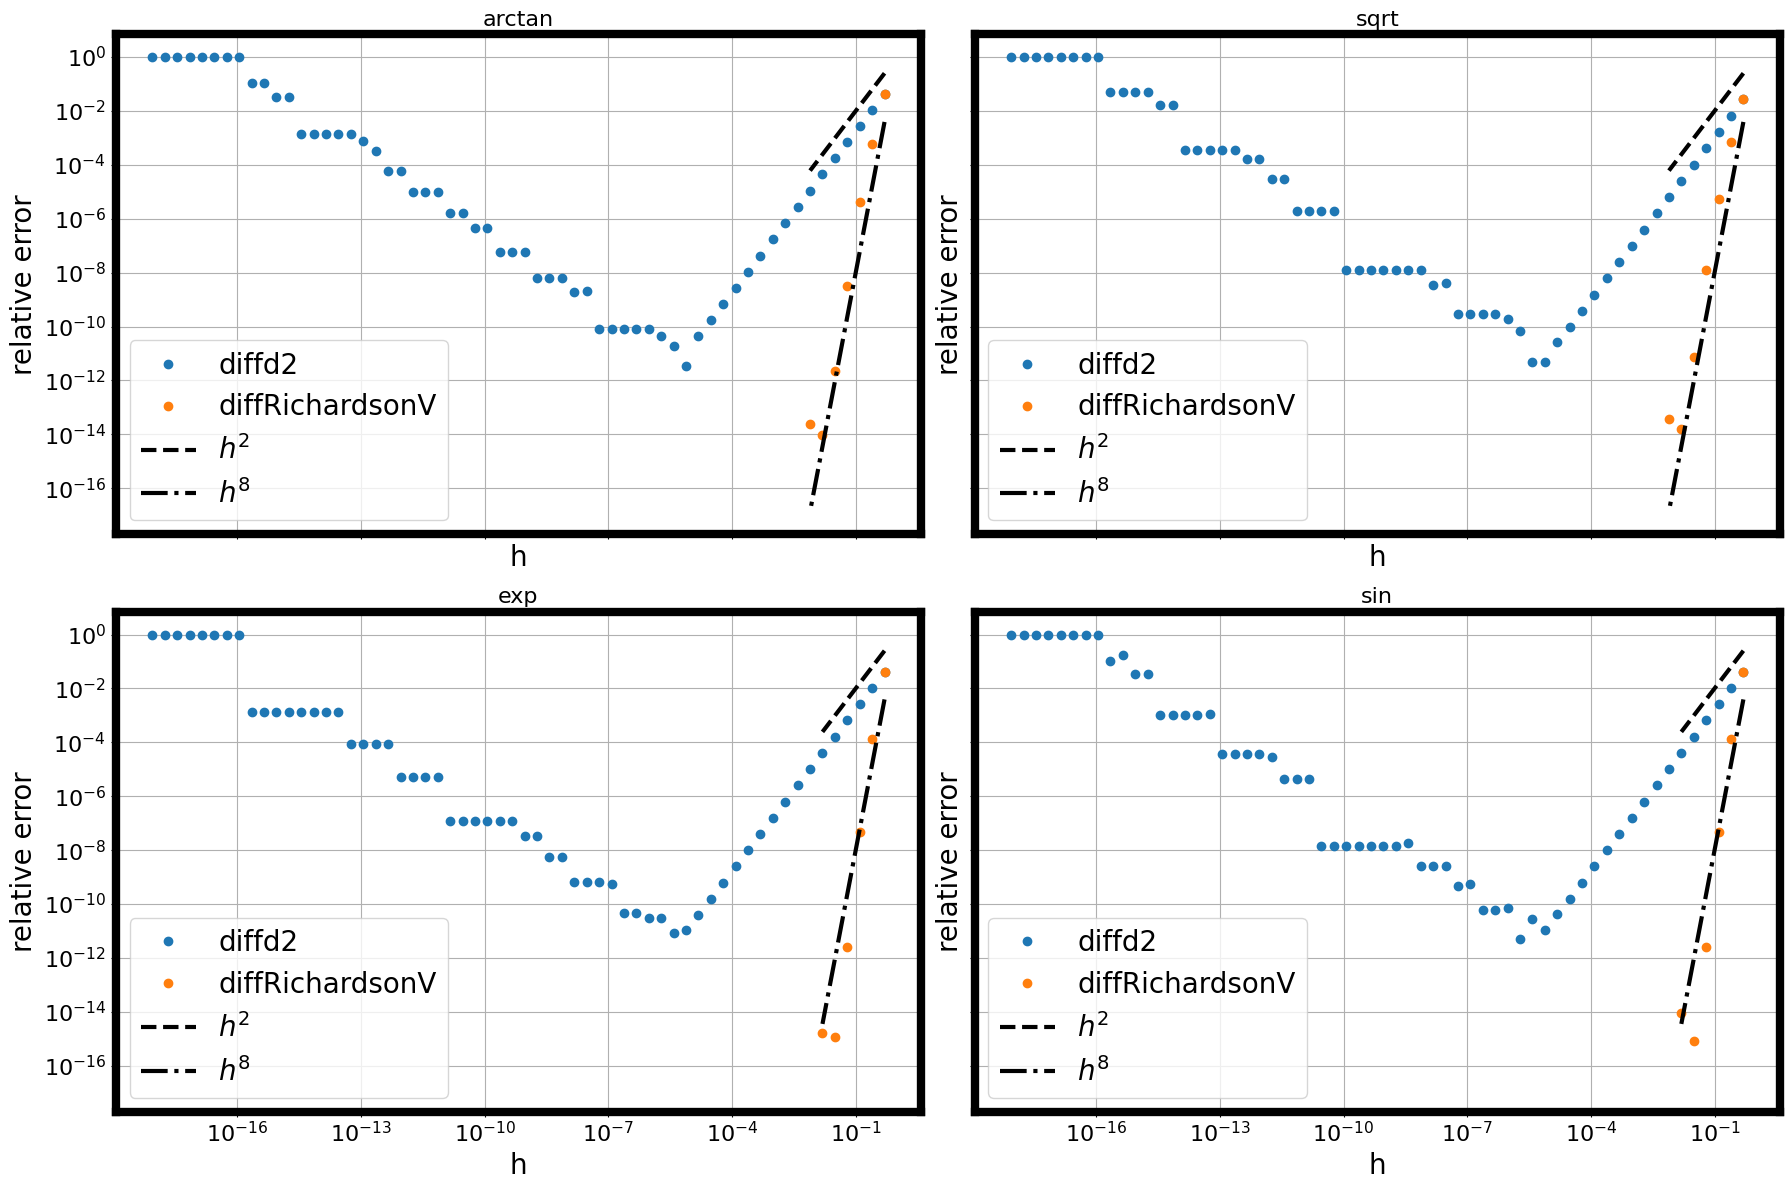

In [38]:
import numpy as np
from matplotlib import pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),
          #'text.fontsize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 16,
          'lines.markersize'  : 12,
          'ytick.labelsize': 16#,
          #'text.usetex': True
          }
plt.rcParams.update(params)

# standard symmetric divided differences of order 2
def diffd2(f,x, h0):
    nit = 60 # max depth of iterations
    h = h0/2**np.arange(nit)
    fp, fm = f(x+h), f(x-h)
    y = (fp-fm)/2/h
    return y, h
    
    

# Richardson extrapolation; fixed level for vectorisation
def diffRichardsonV(f,x, h0, rtol=1e-12, atol=1e-12):
    nit = 30 # max depth of iterations
    # TODO: implement here the symmetric divided differences of order 2
    h = h0/2**np.arange(nit)
    fp, fm = f(x+h), f(x-h)
    y = (fp-fm)/2/h
    for j in range(1,nit):
      fact = 4**j
      y[j:] = (fact*y[j:]- y[j-1:-1])/(fact-1)
      errest= abs(y[j]-y[j-1])
      if errest < rtol*abs(y[j]) or errest< atol:
        break
      
    return y[:j+1], h[:j+1] # return the last computed io to show cancellation
    
# printing routine
def prnt(pname,f,df,x,h0, ax):
    print(f.__name__)
    z, h = pname(f, x, h0)
    rerr = abs(z - df(x)) / df(x)
    ax.loglog(h,rerr, '.', label=pname.__name__)
    print('Relativer Fehler:')
    print( rerr )
    print('-----------')
    return z,h
    
x = 1.1 # where to evaluate
h0 = 0.5 # staring step

datan = lambda x: 1/(1+x**2)
dsqrt = lambda x: 0.5*x**-0.5
dcos = lambda x: -np.sin(x)

lof = [np.arctan, np.sqrt, np.exp, np.sin, np.cos]
lod = [datan, dsqrt, np.exp, np.cos, dcos]

fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axsp = axs.flatten()

for f, df, ax in zip (lof,lod, axsp):
    print('diffd2:')
    prnt(diffd2,f,df,x,h0,ax)
    print('diffRichardsonV:')
    z, h = prnt(diffRichardsonV,f,df,x,h0,ax)
    # one more to get the h
    ax.loglog(h,h**2, 'k--', label='$h^2$')
    ax.loglog(h,h**8, 'k-.', label='$h^8$')
    ax.grid(True, which="both")
    ax.set_xlabel('h')
    ax.set_ylabel('relative error')
    ax.set_title(f.__name__)
    ax.legend()
    
fig.tight_layout()
plt.show()

 #### **Python Various**

Short Intro do Numpy, Vectorization and useful python tips.


In [39]:

x = np.arange(10) # 0,1,2..
print(x[0], x[-1], x[-2]) # 0, 9,8
print(x.reshape(2,5)) # copy with 2 rows and 5 values per row
print(x) # no change
x.shape = (2,5) 
print(x) # changed!
print(x[0]) # not returns an entire row of x since reshaped!
x[0][2] = -2; print(x) # chnaged since x[0] returns view not copy
x[0,2] = -1 # same as above, more efficient
# Types are important!
x[0, 2] = 2.5; print(x[0,2]) # downcast to int thus to 2

y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print([y[1:7:1]]) #([1, 3, 5]) # prints 1 to 7 (excluded 7 in jumps of 1)
print(y[-2:10], y[-2:]) # [8, 9]
print(y[-3:3:-1]) # starts 7 and goes until 3 backwards 7,6,5,4
print(y[2],y[2:3]) # number vs slice of array

print(x[1:10:5, ::-1])
obj = (slice(1, 10, 5), slice(None, None, -1)); print(x[obj])

x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
print(x[:, np.newaxis, :, :].shape) # is synomim to:
print(x[:, None, :, :].shape)

x = np.arange(10, 1, -1); print(x)

y = np.arange(35).reshape(5, 7); print(y)
print(y[np.array([0, 2, 4]), np.array([0, 1, 2])]) # rows 0,2 ,4 indexed at columns 0,1,2 respectively.
print(y[np.array([0, 2, 4]), 1] ) # elements [0,1], [2,1], [4,1]
print(y[np.array([0, 2, 4])]) # copies of the rows 0,2,4 of y

x = np.arange(12).reshape(4,3); print(x)
rows = np.array([[0,0], [3,3]])
cols = np.array([[0,2], [0,2]])

print( x[rows, cols] )
# shorter via broadcasting:
rows = np.array([0, 3])
cols = np.array([0, 2])

print( rows[:, np.newaxis] )
print( x[rows[:, np.newaxis], cols] )

print( x[np.ix_(rows, cols)] )
print( np.ix_(rows, cols) )

0 9 8
[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]
[[ 0  1 -2  3  4]
 [ 5  6  7  8  9]]
2
[array([1, 2, 3, 4, 5, 6])]
[8 9] [8 9]
[7 6 5 4]
2 [2]
[[9 8 7 6 5]]
[[9 8 7 6 5]]
(2, 1, 3, 1)
(2, 1, 3, 1)
[10  9  8  7  6  5  4  3  2]
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
[ 0 15 30]
[ 1 15 29]
[[ 0  1  2  3  4  5  6]
 [14 15 16 17 18 19 20]
 [28 29 30 31 32 33 34]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  2]
 [ 9 11]]
[[0]
 [3]]
[[ 0  2]
 [ 9 11]]
[[ 0  2]
 [ 9 11]]
(array([[0],
       [3]]), array([[0, 2]]))


#### **Skalarproducts, Kron, Einsum**


In [40]:
a= np.array([1.,2.,3.])
b= np.array([4.j,5.j,6.j])
print(a*b)
print(np.tensordot(b, a, axes=1))

print(np.outer(b,a)) # bxa matrix
print(np.outer(b.conj(),a))

print(np.tensordot(b, a, axes = -1)) # tensor product of b and a
print(np.tensordot(b.conj(), a, axes = -1)) # tensor product

print( np.einsum('i,i',b,a) ) # np.dot(b,a)
print( np.einsum('i,j',b,a) ) # outer product
print( np.einsum('i,i->i',b,a) ) # b*a

A, B = np.array([[1,2],[3,4]]), np.array([[10,11],[12,13]])
print(A, B)
print( np.outer(A,B) )
print( np.kron(A,B) ) # Kroneker product
print( np.einsum('ij,kl->ikjl',A,B).reshape(4,4) ) # Kroneker product
print( np.einsum('ik,kj->ij',A,B) ) # A @ B
print( np.einsum('ik,kj->ji',A,B) ) # (A @ B).T
print( np.einsum('ii->i',A) ) # diag(A)
print( np.einsum('ii->',A) ) # trace(A)
x = np.array([-1., -2.])
print( np.einsum('ij,j->i',A,x) ) # A @ x
print( np.einsum('i,ij->j',x,A) ) # x.dot(A)
print( np.einsum('s,st,t->',x,A,x) ) # x.dot(A @ x) quadratic form

def fastmultiply(D,A): # faster computation by using broadcasting
  
  X = D.diagonal()[:,np.newaxis]* A
  return(X)

def fastmultiply(A,B,x): #for ranked matrices with known p<<n
    n, p = A.shape
    y = np.zeros(n)
    for k in range(p):
        v = B[:,k] * x
        s = v[::-1].cumsum()[::-1]
        y += A[:,k] * s
    return(y)

def fastKmultiply(A,B,x): #Kronecker Product
    n, k = A.shape[1], B.shape[1]
    assert x.size == n*k, 'size mismatch'
    xx = x.reshape(n,k)
    Z = np.tensordot(xx, B.T, axes = 1)
    y = np.dot(A,Z)
    return y.ravel()

[0. +4.j 0.+10.j 0.+18.j]
32j
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[[0. -4.j 0. -8.j 0.-12.j]
 [0. -5.j 0.-10.j 0.-15.j]
 [0. -6.j 0.-12.j 0.-18.j]]
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[[0. -4.j 0. -8.j 0.-12.j]
 [0. -5.j 0.-10.j 0.-15.j]
 [0. -6.j 0.-12.j 0.-18.j]]
32j
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[0. +4.j 0.+10.j 0.+18.j]
[[1 2]
 [3 4]] [[10 11]
 [12 13]]
[[10 11 12 13]
 [20 22 24 26]
 [30 33 36 39]
 [40 44 48 52]]
[[10 11 20 22]
 [12 13 24 26]
 [30 33 40 44]
 [36 39 48 52]]
[[10 11 20 22]
 [12 13 24 26]
 [30 33 40 44]
 [36 39 48 52]]
[[34 37]
 [78 85]]
[[34 78]
 [37 85]]
[1 4]
5
[ -5. -11.]
[ -7. -10.]
27.0


### **Chapter 1 - Interpolation**

Interpolation of functions is a very common task. The task is given by Datapoints xi and Values yi of the f(xi). The goal is to find a good f' so that f ~ f'. With the conditions that for the given xi, f'(xi)= yi. 

F is lies in a infinite Vector Space V wth functions of different smoothness. What we look for is an approximation of f  by f' with f' being in an linear subspace V' of V with V' being finite with dimension n.

![Interpolation1](Images/Chapter1-Interpolation1.png)

With the above bj(x) building a Basis of V' ie. span{b1,...,bn}= V'


Example of such Basis Function are:

![Basisfunctions](Images/Chapter1-Basisfunctions.png)


Calculations with so called Monomial Basis with, can determine given k+1 points any polynomial of dimension k. The problem is the following:

![P(X)](Images/Chapter1-Interpolation2.png)

![MatrixPoly](Images/Chapter1-Interpolation3.png)

To solve this matrice one can use np.polyfit. This method though is very error prone and so better methods have emerged. One of these methods is the so called Horner-Schema:


![HornerSchema](Images/Chapter1-InterpolationHornerSchema.png)

Numpy uses polyval(p,x) with an array p(an, an-1...,a0) that hold the interpolation values, that implements the HornerSchema.
Polyfit often returns error prone coefficient but polyval often returns good approxiamation in the Monomial Basis.


##### **Newton-Basis and divided differences**

When using the Monomial-Basis, if new points are added the Interpolation Polynomial has to be computed again from scratch. This is very computation heavy and in fields such as Physics not feasable. With the Newton-Basis we can include new Datapoints without "losing" information about the old ones. Example for 2 and 3 points: 

![Newton1](Images/Chapter1-NewtonBasis1.png)

![Newton2](Images/Chapter1-NewtonBasis2.png)

The Newton Basis is the following:

![Newton3](Images/Chapter1-NewtonBasis3.png)

What we have to do now is to get the coefficient β1...βn for the polynomial.

The Matrix has 0 when x = x0,x1,...xn-1 for Nn(x) (multiplication with 0 occurs there)

![Newton4](Images/Chapter1-NewtonBasis4.png)

Furthermore we can see that results from smaller indices are needed again for the later ones. This leads to the method of "*divided differences*" that utilizes this finding. The divided differences are the following:

![DividedDiff1](Images/Chapter1-DividedDiff1.png)

If the given points x are equidistant with a distance of h the formula simplifies to:

![DividedDiff2](Images/Chapter1-DividedDiff2.png)

And finally, we can read the coefficients βj with βj = y(x0,x1,...xj) to complete out Newton Polynomial.

![DividedDiff3](Images/Chapter1-DividedDiff3.png)

'divdiff_sqw' ran 4 times. Best time: 0.300083 secs.
rec:
rec: 0.2935200999490917  seconds
'divdiff' ran 4 times. Best time: 0.004380 secs.
vec: 0.004380199941806495  seconds
The vectorised version is  6850.901878562515  percent faster than the sequetial
The vectorised version is  6701.066249227821  percent faster than the recursive
'divdiff' ran 4 times. Best time: 0.000063 secs.
'evalNewton' ran 4 times. Best time: 0.000093 secs.


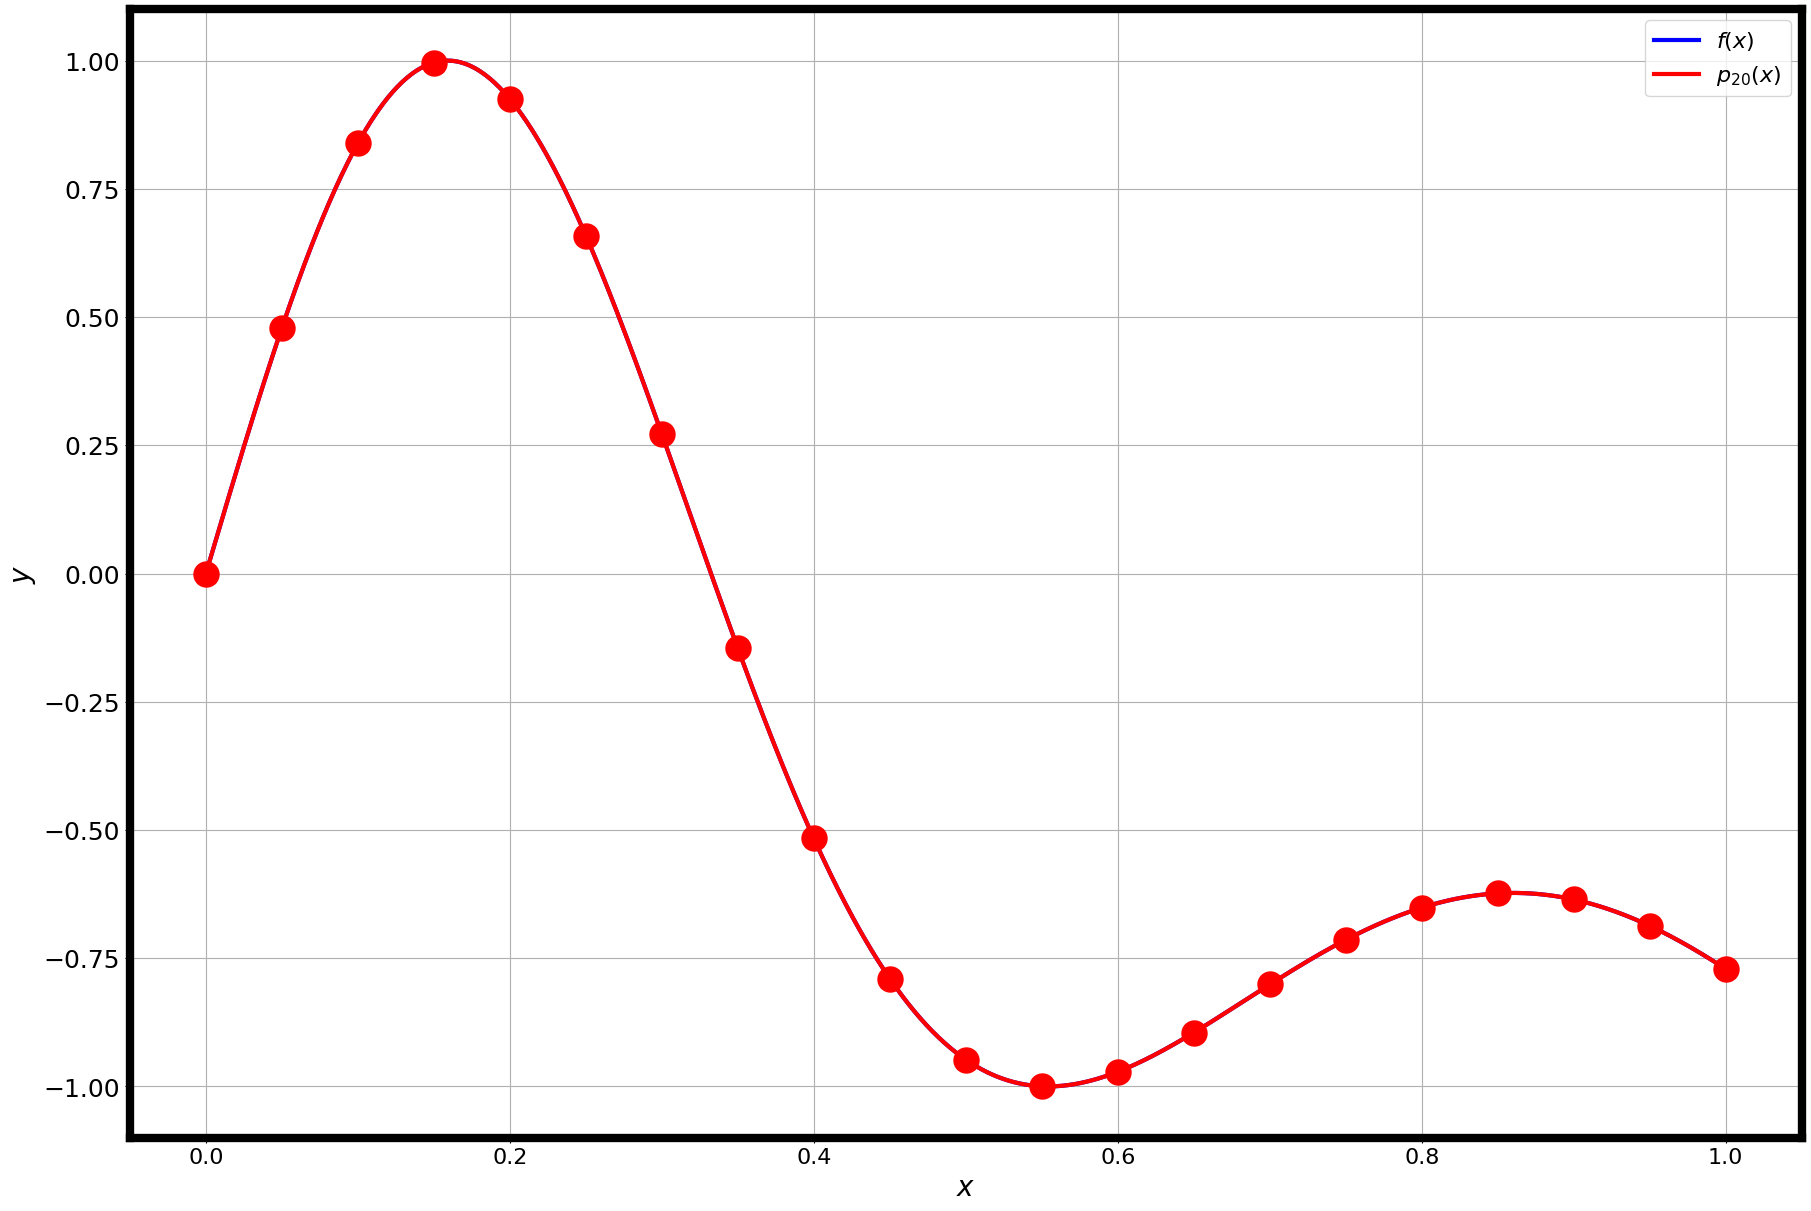

In [41]:
import numpy as np
import time
import copy
from functools import wraps


def time_it_pro(repetitions=3):
    """
    A decorator factory that measures function execution time.

    It runs the function multiple times, finds the minimum execution time,
    and stores it in a 'min_time' attribute on the decorated function.
    It also ensures the original input data is not modified.

    Args:
        repetitions (int): The number of times to run the function
                             to find the minimum execution time.
    """
    if not isinstance(repetitions, int) or repetitions <= 0:
        raise TypeError("Repetitions must be a positive integer.")

    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            run_times = []
            last_result = None

            for _ in range(repetitions):
                # Create a fresh deep copy for EACH repetition
                args_copy = copy.deepcopy(args)
                kwargs_copy = copy.deepcopy(kwargs)
                
                start_time = time.perf_counter()
                last_result = func(*args_copy, **kwargs_copy)
                end_time = time.perf_counter()
                
                run_times.append(end_time - start_time)
            
            # Find the minimum time and store it as an attribute on this wrapper
            min_run_time = min(run_times)
            wrapper.min_time = min_run_time
            
            print(
                f"'{func.__name__}' ran {repetitions} times. "
                f"Best time: {min_run_time:.6f} secs."
            )
            
            # Return the result from the last execution
            return last_result

        # Initialize the attribute to avoid an AttributeError if the function is never called
        wrapper.min_time = None
        return wrapper
    return decorator

# --- Example Usage ---

# Use the decorator by calling it with the number of repetitions
#@time_it_pro(repetitions=5)
#  Access the stored minimum time directly from the function's attribute
# CAUTION: it does not work for a recursive function but those are anyway "bad style in python"



nrEXP = 4
# -------- start plotting settings ----------------
import matplotlib.pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),#(36,24),#(18,12),
          'axes.titlesize': 16,
          'legend.fontsize': 16,
          'xtick.labelsize': 16,
          'lines.markersize'  : 18,
          'axes.linewidth' : 6,
          'lines.linewidth': 3,
          'ytick.labelsize': 18#,
          #'text.usetex': True
          }
plt.rcParams.update(params)
plt.rcParams['figure.constrained_layout.use'] = True
import matplotlib.ticker as plticker

# -------- end plotting settings ----------------

# (a) sequentielle Berechnung der Newton Koeffizienten
@time_it_pro(repetitions=nrEXP)
def divdiff_sqw(x,y):
    """
    x = node set (mutually different)
    y = nodal values, will be overwritten: no copy
    Returns the coefficients of the polynomial in Newton basis
    """
    z = y.copy()
    n = y.shape[0]

    
    for i in range(0,n):
        j = i-1
        while j >= 0: 
            z[j] = (z[j+1] - z[j]) / ( x[i] - x[j] )
            j -= 1
        y[i] = z[0]
    return(y)

    # TODO: implement here the serial versio

# (b) vectorisierte Berechnung der Newton Koeffizienten
@time_it_pro(repetitions=nrEXP)
def divdiff(x,y):


    """
    x = node set (mutually different)
    y = nodal values, will be overwritten: no copy
    Returns the coefficients of the polynomial in Newton basis
    vectorized version: fastest possible
    """   
    # TODO: implement here the vectorized version
    n = len(x)
    for j in range(1,n):
        y[j:n]= (y[j:n]-y[j-1:n-1])/(x[j:n]-x[:n-j])
    return y

# (c) rekursive Berechnung der Newton Koeffizienten
# DO NOT USE the above decorator for recursive functions
def divdiff_rec(x, y):
    """
    x = node set (mutually different)
    y = nodal values, will be overwritten: no copy
    Returns the coefficients of the polynomial in Newton basis
    uses recursion
    """

    # TODO: implement here the recursive  version
    n = y.shape[0] - 1
    
    # Recursive implementation
    if n > 0:
        y[0:n] = divdiff_rec(x[0:n], y[0:n])
        for j in range(0,n):
            y[n] = (y[n] - y[j]) / (x[n] - x[j])

    return y

# (d) effiziente Auswertung des Netwon Intrepolationspolynom
@time_it_pro(repetitions=nrEXP)
def evalNewton(x, dd, xx):
    """
    Evaluiert das Newton-Polynom

    Input: x  ... Stuetzstellen
           dd ... dividierte Differenzen
           xx ... auswertungspunkte

    Output: yy ... Newton-Polynom ausgewertet an xx
    """
    # TODO: implement here a vectorized version
    r = 0*xx + dd[-1]
    n= len(dd)
    for i in range(n-2,-1,-1):
        r = r*(xx-x[i])+ dd[i]
    return r
    
if __name__ == "__main__":

    """
    # if you want to check correctness, test with the following small example
    x = np.array([1., 2., 3., 4., 5., 6.])
    y = np.array([2., 4., 6., 5., 8., 2.])

    # expected result:
    # [ 2.00000   2.00000   0.00000  -0.50000   0.41667  -0.25000 ]

    print('x=',x)
    print('y=',y)
    # and uncomment the commands  print(w) below
    # and comment out the large data set
    """

    # a large set of data fortime measurements
    x = 1.*np.arange(1,10**3) # some nodes
    y = 2.*np.sin(x) # some values
    
    yc = y.copy() # without this y is destroyed
    w = divdiff_sqw(x, yc)#; print(w)
 
    print('rec:')
    ts = []
    for k in range(nrEXP):
        yc = y.copy()
        start = time.perf_counter()
        w = divdiff_rec(x, yc)
        end = time.perf_counter()
        #print(w)
        ts.append(end-start)
    rec = min(ts)    
    print('rec:', rec, ' seconds')
    
    yc = y.copy()
    w = divdiff(x, yc)#; print(w)
    print('vec:', divdiff.min_time,' seconds')
    
    print('The vectorised version is ', 100*divdiff_sqw.min_time/divdiff.min_time, ' percent faster than the sequetial')   
    print('The vectorised version is ', 100*rec/divdiff.min_time, ' percent faster than the recursive')
    # a visual check of correctness....
    n = 20
    x = np.linspace(0,1,endpoint=True, num=n+1)
    f = lambda x: np.sin(10*x*np.cos(x))
    yx = f(x)
    y = yx.copy()
    dd = divdiff(x, y)
    N = 1000
    t = np.linspace(0,1,endpoint=True, num=N+1)


    yt = evalNewton(x, dd, t)

    plt.figure()
    plt.plot(t, f(t), "-b", label=r"$f(x)$")
    plt.plot(x, yx, "or")
    plt.plot(t, yt, "-r", label=r"$p_{20}(x)$")
    plt.grid(True)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.legend()
    plt.show()

##### **Lagrange and barycentric Interpolationformulas**

The error for the last method (Newton) was depended on the choice of anchor points chosen. In this step we change our approach and define a new Basis that lets us investigate the error p(x)- p'(x) easier. The Lagrange Polynomials are given by the following formula:

![LagrangePoly1](Images/Chapter1-LagrangePoly1.png)

The Lagrange Polynomials at anchor points (x0,y0)... (xi,yi) build a Basis for the Polynomials Pn.

![LagrangePoly2](Images/Chapter1-LagrangePoly2.png)

The following properties of the Lagrange Polynomials are clear:

![LagrangePoly3](Images/Chapter1-LagrangePoly3.png)

From this we can derive the barycentric Formula with 
Ln(x)= (x-x0)*(x-x1)*(x-x2)...*(x-xn) and λk:

![LagrangePoly4](Images/Chapter1-LagrangePoly4.png)

We can reweire the polynomial p(x):

![LagrangePoly5](Images/Chapter1-LagrangePoly5.png)

And after defining the constant Polynomial 1 we can simplify to the barycentric formula:

![LagrangePoly6](Images/Chapter1-LagrangePoly6.png)

![LagrangePoly7](Images/Chapter1-LagrangePoly7.png)

This formula is invariant in the intervall [a,b] with a= x0 < x1... xn<b

The evaluation at a point x in the Intervall is very stable and can be executed in O(n) if the λk have been compued in advance (O(n^2)). For special anchor points, the so called Chebyshev Nodes(Next Chapter) we can calculate the λk even faster O(1). 

The Lebesque Constant is used to find an upperbound of the error in a given intervall [a,b] with anchor points x0...xn woth li being the Lagrange Polynomial.

![LagrangePoly8](Images/Chapter1-LagrangePoly8.png)

![LagrangePoly9](Images/Chapter1-LagrangePoly9.png)

So the error is only dependant on the choice of our anchor points. For example for equidistant points we can see that the error is pretty bad:

![LagrangePoly10](Images/Chapter1-LagrangePoly10.png)

The also explains the Runge Phenomenon, by observing the Runge-Fucntion: f(x)= 1/(1+x^2) at the interval [-5,5].
If we use equdistant points, we can see that at the endpoints, there is strong Oscillation that leads to a big error. What is even more astonishing, is the fact that by increasing the polynomial degree, the error gets even worse!

![LagrangePoly11](Images/Chapter1-LagrangePoly11.png)





##### **Chebyshev Interpolation**

To avoid the above mentione derror Phenomena we want to chose our anchor points wisely. For this we will use the Chebyshev Nodes.

We define Chebyshev Polynomials of first and second order.

![ChebyshevPoly1](Images/Chapter1-ChebyshevPoly1.png)

![ChebyshevPoly2](Images/Chapter1-ChebyshevPoly2.png)

THe following properties hold for the Chebyshev Polynomials:

![ChebyshevPoly3](Images/Chapter1-ChebyshevPoly3.png)

The n+1 Chebyshev Nodes x0,...,xn in [-1,1] are given by the Zeropoints of Tn+1(x)(First Order):

![ChebyshevPoly4](Images/Chapter1-ChebyshevPoly4.png)

The Chebyshev Extrema n-1 (x0,...,xn-2) in [-1,1] are the Extrema of Tn(x). At the same time they are the zeropoints of Un-1(x) (second Order Cheby.Polynom) when including endpoints: 

![ChebyshevPoly5](Images/Chapter1-ChebyshevPoly5.png)

With the error approximation derived in the last Section, we can see that the error is minimal between the Chebyshev Nodes (Zero points of Tn(x)).

![ChebyshevPoly6](Images/Chapter1-ChebyshevPoly6.png)

The extrema of T2n(x) include the Zero Points (Between each Extrema is a Zero Point) this Chebyshev Extrema are more commonly used in connection with Fourier Transform (see next Chapter).

 Now if we go back to the Runge Function we can compare the error and can see that not only is the error less than the Equidistant points, but by increasing the Grade, we get less and less error!

 ![ChebyshevPoly7](Images/Chapter1-ChebyshevPoly7.png)

 ![ChebyshevPoly8](Images/Chapter1-ChebyshevPoly8.png)





